# 03_OC-SVM [One Class Support Vector Machines]
#### Using machine learning to establish additional ground truths

In [1]:
# Importing Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle
import scipy

In [2]:
#Loading Pickle file
directory = fr'N:\Mark\Audio Diss\OCC_SVM_Data\yavari_2018\audios_part_2\GY3\Data\wav_split'
pickle_file_path = os.path.join(directory, 'split_processed_audio.pickle')

if os.path.exists(pickle_file_path):
    # Load the DataFrame from the pickle file
    split_audio_data = pd.read_pickle(pickle_file_path)
    print('split_audio_data loaded')
    print(f'total entries:',len(split_audio_data))
    
else:
    print('pickle file not found')

pickle file not found


<Figure size 1400x1000 with 0 Axes>

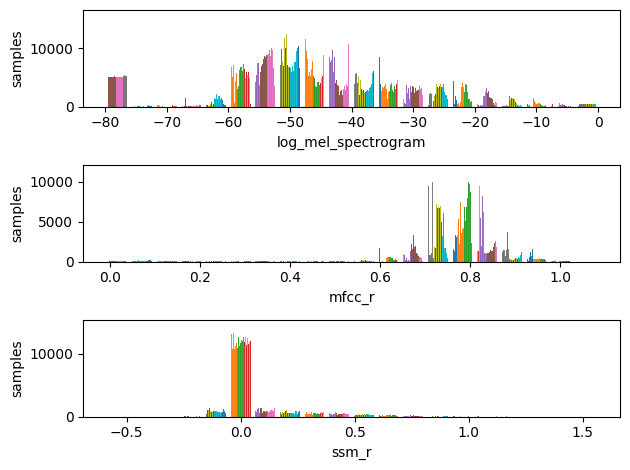

In [9]:
#Plot

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))


# Create the subplots
fig, axes = plt.subplots(nrows=3, ncols=1)

# Plot the first histogram
axes[0].hist(split_audio_data['log_mel_spectrogram'], bins=20)
axes[0].set_xlabel('log_mel_spectrogram')
axes[0].set_ylabel('samples')

# Plot the second histogram
axes[1].hist(split_audio_data['mfcc_r'], bins=20)
axes[1].set_xlabel('mfcc_r')
axes[1].set_ylabel('samples')

# Plot the third histogram
axes[2].hist(split_audio_data['ssm_r'], bins=20)
axes[2].set_xlabel('ssm_r')
axes[2].set_ylabel('samples')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [106]:
#MFCC - SSM
ssm = []
mfcc = []
for i in split_audio_data:
    for j in split_audio_data['mfcc']:
        mfcc.append(np.mean(j))
    for z in split_audio_data['ssm_r']:
        ssm.append(np.mean(z))
        
df = pd.DataFrame({'mfcc': mfcc, 'ssm':ssm})
df.describe()

,mfcc,ssm
count,122400.000000,122400.000000
mean,-13.146235,0.062932
std,1.429369,0.007416
min,-15.174419,0.042710
25%,-14.366598,0.057242
50%,-13.426976,0.063103
75%,-12.331260,0.068626
max,-4.737278,0.091335


In [94]:
#SK Learn OC-SVM
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='rbf', gamma= 0.001, nu = 0.02).fit(df)
y_pred = model.predict(df)

anomaly_val = df.iloc[np.where(y_pred== -1)]
print(anomaly_val)

             ssm        lms
0       0.084105 -58.490829
46      0.075523 -37.871517
65      0.047706 -58.448372
112     0.054732 -33.368114
124     0.060002 -36.533745
...          ...        ...
122369  0.059160 -37.531227
122371  0.055745 -37.845013
122376  0.072854 -37.268646
122379  0.059213 -37.644524
122382  0.059516 -37.657810

[2448 rows x 2 columns]


Text(0.5, 1.0, 'Anomaly Detection')

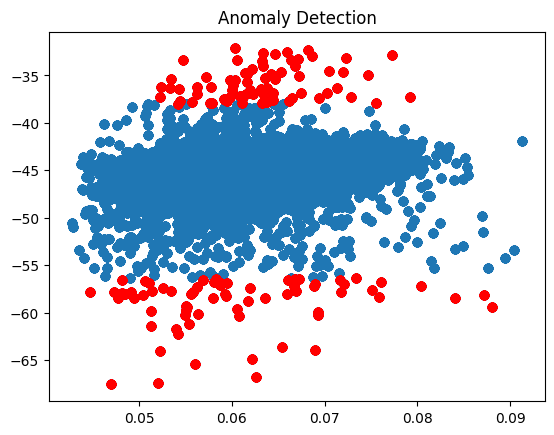

In [95]:
#Visualise Anomalies
plt.scatter(df['ssm'], df['lms'])
plt.scatter(anomaly_val['ssm'], anomaly_val['lms'], c = 'r')
plt.title('Anomaly Detection')

In [108]:
#Get ground truth from anomalies
gt_audio_data = split_audio_data[~split_audio_data.index.isin(anomaly_val.index)]

In [112]:
#Pickle output
directory = fr'N:\Mark\Audio Diss\pickle_data'
gt_pickle_file_path = os.path.join(directory, 'gt_processed_audio.pickle')

gt_audio_data.to_pickle(gt_pickle_file_path, protocol=pickle.HIGHEST_PROTOCOL)